# Introduction

## Get Data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-07-19 15:24:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  31.6MB/s    in 3.3s    

2022-07-19 15:24:41 (31.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

In [6]:
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

There are 2 directories and 0 images in "pizza_steak".
There are 2 directories and 0 images in "pizza_steak/test".
There are 0 directories and 250 images in "pizza_steak/test/steak".
There are 0 directories and 250 images in "pizza_steak/test/pizza".
There are 2 directories and 0 images in "pizza_steak/train".
There are 0 directories and 750 images in "pizza_steak/train/steak".
There are 0 directories and 750 images in "pizza_steak/train/pizza".


In [7]:
import pathlib 
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + '/' + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  print(f'Image shape: {img.shape}')

  return img

['1392718.jpg']
Image shape: (512, 512, 3)


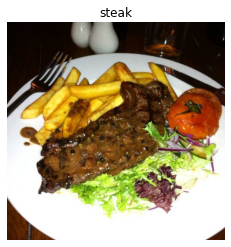

In [9]:
img = view_random_image(target_dir='pizza_steak/train/', target_class='steak')

In [10]:
import tensorflow as tf

In [11]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 6,  2,  0],
        [ 7,  3,  0],
        [ 7,  3,  0],
        ...,
        [ 4,  3,  1],
        [ 4,  3,  1],
        [ 4,  3,  1]],

       [[ 7,  3,  0],
        [ 8,  4,  1],
        [ 8,  4,  1],
        ...,
        [ 4,  3,  1],
        [ 4,  3,  1],
        [ 5,  4,  2]],

       [[ 7,  3,  0],
        [ 8,  4,  1],
        [ 8,  4,  1],
        ...,
        [ 5,  4,  2],
        [ 5,  4,  2],
        [ 5,  4,  2]],

       ...,

       [[67, 26,  4],
        [65, 27,  4],
        [64, 26,  3],
        ...,
        [50, 23,  2],
        [51, 24,  3],
        [51, 26,  4]],

       [[68, 27,  5],
        [67, 26,  4],
        [65, 27,  4],
        ...,
        [49, 24,  2],
        [49, 24,  2],
        [49, 24,  2]],

       [[69, 28,  6],
        [68, 27,  5],
        [65, 27,  4],
        ...,
        [53, 28,  6],
        [52, 27,  5],
        [49, 27,  4]]], dtype=uint8)>

In [12]:
tf.constant(img).shape

TensorShape([512, 512, 3])

## Building model
* Loading images
* Preprocessing images
* Building CNN
* Compiling CNN
* Fitting CNN

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
train_data

In [ ]:
pizza_steak_model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation='relu',
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding='valid'),

  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')          
])


pizza_steak_model_1.compile(loss='binary_crossentropy',
                            optimizer='adam',
                            metrics=['accuracy'])

history_1 = pizza_steak_model_1.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=valid_data,
                                  validation_steps=len(valid_data))

In [ ]:
pizza_steak_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

['1623325.jpg']
Image shape: (512, 512, 3)
['1916846.jpg']
Image shape: (512, 512, 3)


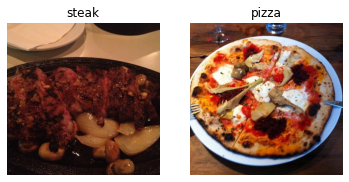

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

In [ ]:
!nvidia-smi

Mon Jul 18 14:13:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    33W /  70W |   2348MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Baseline

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(42)


pizza_steak_model_2 = tf.keras.models.Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)),  
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),

  Flatten(),
  Dense(1, activation='sigmoid')          
])


pizza_steak_model_2.compile(loss='binary_crossentropy',
                            optimizer=Adam(),
                            metrics=['accuracy'])

history_2 = pizza_steak_model_2.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=valid_data,
                                  validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 204ms/step - loss: 1.0109 - accuracy: 0.5087 - val_loss: 0.6545 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6029 - accuracy: 0.6373 - val_loss: 0.4718 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4587 - accuracy: 0.7840 - val_loss: 0.4587 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3996 - accuracy: 0.8240 - val_loss: 0.4466 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3351 - accuracy: 0.8600 - val_loss: 0.5194 - val_accuracy: 0.7440


## Improving until satisfied

In [ ]:
train_datagen_aug = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    rescale=1/255.,
    shear_range=0.2
)

In [ ]:
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       class_mode='binary',)

Found 1500 images belonging to 2 classes.


In [ ]:
tf.random.set_seed(42)


pizza_steak_model_3 = tf.keras.models.Sequential([
  Conv2D(filters=64,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),

  Flatten(),
  Dense(1, activation='sigmoid')          
])


pizza_steak_model_3.compile(loss='binary_crossentropy',
                            optimizer=Adam(),
                            metrics=['accuracy'])

history_3 = pizza_steak_model_3.fit(train_data_aug,
                                  epochs=9,
                                  steps_per_epoch=len(train_data),
                                  validation_data=valid_data,
                                  validation_steps=len(valid_data))

Epoch 1/9
47/47 [==============================] - 26s 519ms/step - loss: 0.6262 - accuracy: 0.6267 - val_loss: 0.4475 - val_accuracy: 0.7720
Epoch 2/9
47/47 [==============================] - 23s 488ms/step - loss: 0.4951 - accuracy: 0.7607 - val_loss: 0.4021 - val_accuracy: 0.8160
Epoch 3/9
47/47 [==============================] - 23s 492ms/step - loss: 0.4822 - accuracy: 0.7807 - val_loss: 0.3241 - val_accuracy: 0.8640
Epoch 4/9
47/47 [==============================] - 23s 487ms/step - loss: 0.5102 - accuracy: 0.7600 - val_loss: 0.3670 - val_accuracy: 0.8320
Epoch 5/9
47/47 [==============================] - 24s 510ms/step - loss: 0.4489 - accuracy: 0.7933 - val_loss: 0.3347 - val_accuracy: 0.8540
Epoch 6/9
47/47 [==============================] - 23s 489ms/step - loss: 0.4682 - accuracy: 0.7887 - val_loss: 0.3334 - val_accuracy: 0.8580
Epoch 7/9
47/47 [==============================] - 23s 490ms/step - loss: 0.4767 - accuracy: 0.7860 - val_loss: 0.3371 - val_accuracy: 0.8580
Epoch 

In [ ]:
pizza_steak_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 64)      

Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.2270 - accuracy: 0.9207 - val_loss: 0.3854 - val_accuracy: 0.8160
3c

Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3603 - accuracy: 0.8493 - val_loss: 0.3089 - val_accuracy: 0.8760
3c 3mp

Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3760 - accuracy: 0.8380 - val_loss: 0.2929 - val_accuracy: 0.8860
3c 3mp 64 filters

Epoch 10/10
47/47 [==============================] - 9s 199ms/step - loss: 0.1142 - accuracy: 0.9520 - val_loss: 0.4944 - val_accuracy: 0.8280
same

## Making predictions on my own data

In [ ]:
!wget https://i0.wp.com/www.onceuponachef.com/images/2019/09/How-to-Pan-Sear-Steak.jpg

--2022-07-18 14:18:44--  https://i0.wp.com/www.onceuponachef.com/images/2019/09/How-to-Pan-Sear-Steak.jpg
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6692866 (6.4M) [image/jpeg]
Saving to: ‘How-to-Pan-Sear-Steak.jpg’

How-to-Pan-Sear-Ste 100%[===================>]   6.38M  29.7MB/s    in 0.2s    

2022-07-18 14:18:45 (29.7 MB/s) - ‘How-to-Pan-Sear-Steak.jpg’ saved [6692866/6692866]



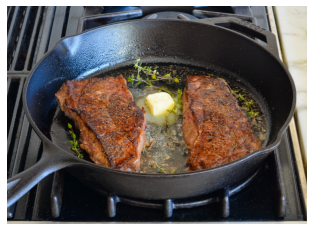

In [ ]:
steak = mpimg.imread('How-to-Pan-Sear-Steak.jpg')
plt.imshow(steak)
plt.axis(False);

In [ ]:
1

1

In [ ]:
def prepare_and_predict(image, model=pizza_steak_model_3, input_shape=(224, 224), class_names=class_names):
  # resize to (224, 224)
  image = tf.image.resize(image, input_shape)

  # Rescale to (0, 1)
  image= image/255.

  # Predict
  y_pred = model.predict(tf.expand_dims(image, axis=0))
  print(y_pred)

  # Round
  y_pred = int(tf.round(y_pred))

  # Show image
  plt.imshow(image)
  plt.axis(False)
  plt.title(f'Predicted: {class_names[y_pred]}')


  return y_pred

[[0.74889433]]


1

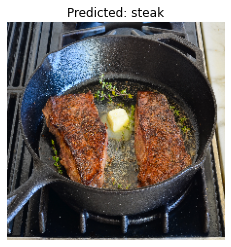

In [ ]:
y_pred = prepare_and_predict(steak)
y_pred

In [ ]:
class_names[y_pred]

'steak'

### Next one

In [ ]:
!wget https://restaumatic-production.imgix.net/uploads/accounts/16987/media_library/b1c61261-3c58-40b8-928a-f008373e53d0.png

--2022-07-18 14:18:47--  https://restaumatic-production.imgix.net/uploads/accounts/16987/media_library/b1c61261-3c58-40b8-928a-f008373e53d0.png
Resolving restaumatic-production.imgix.net (restaumatic-production.imgix.net)... 199.232.78.208, 2a04:4e42:53::720
Connecting to restaumatic-production.imgix.net (restaumatic-production.imgix.net)|199.232.78.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 956733 (934K) [image/png]
Saving to: ‘b1c61261-3c58-40b8-928a-f008373e53d0.png’

b1c61261-3c58-40b8- 100%[===================>] 934.31K  --.-KB/s    in 0.04s   

2022-07-18 14:18:47 (20.6 MB/s) - ‘b1c61261-3c58-40b8-928a-f008373e53d0.png’ saved [956733/956733]



In [ ]:
pizza = mpimg.imread('b1c61261-3c58-40b8-928a-f008373e53d0.png')
prepare_and_predict(pizza)

ValueError: ignored

# Multiclass Classification

## Get data

In [13]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2022-07-19 12:36:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   219MB/s    in 2.3s    

2022-07-19 12:36:44 (219 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [14]:
import os

In [15]:
for root, dir, files in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dir)} directories and {len(files)} files in directory {root}.')
  # print(root, dir, files)

There are 2 directories and 0 files in directory 10_food_classes_all_data.
There are 10 directories and 0 files in directory 10_food_classes_all_data/test.
There are 0 directories and 250 files in directory 10_food_classes_all_data/test/sushi.
There are 0 directories and 250 files in directory 10_food_classes_all_data/test/chicken_wings.
There are 0 directories and 250 files in directory 10_food_classes_all_data/test/steak.
There are 0 directories and 250 files in directory 10_food_classes_all_data/test/grilled_salmon.
There are 0 directories and 250 files in directory 10_food_classes_all_data/test/chicken_curry.
There are 0 directories and 250 files in directory 10_food_classes_all_data/test/hamburger.
There are 0 directories and 250 files in directory 10_food_classes_all_data/test/pizza.
There are 0 directories and 250 files in directory 10_food_classes_all_data/test/ramen.
There are 0 directories and 250 files in directory 10_food_classes_all_data/test/ice_cream.
There are 0 directo

In [16]:
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

In [17]:
import tensorflow as tf

In [18]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

In [19]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224))

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Visualizing Data

In [20]:
class_names = list(train_data.class_indices.keys())
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [21]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [22]:
def view_random_image(target_dir=train_dir, how_many=3):
  images, labels = train_data.__next__()
  if how_many > len(images):
    print('Max number: 32')
    return
  width = min(how_many, 3)
  height = (how_many - 1) // width + 1
  plt.figure(figsize=(20, 16))
  for i in range(how_many):
    plt.subplot(height, width, i+1)
    r_index = random.randint(0, len(images)-1)
    plt.imshow(images[r_index])
    plt.title(class_names[labels[r_index].argmax()])
    plt.axis(False)
    
    images = np.delete(images, r_index, axis=0)
    labels = np.delete(labels, r_index, axis=0)

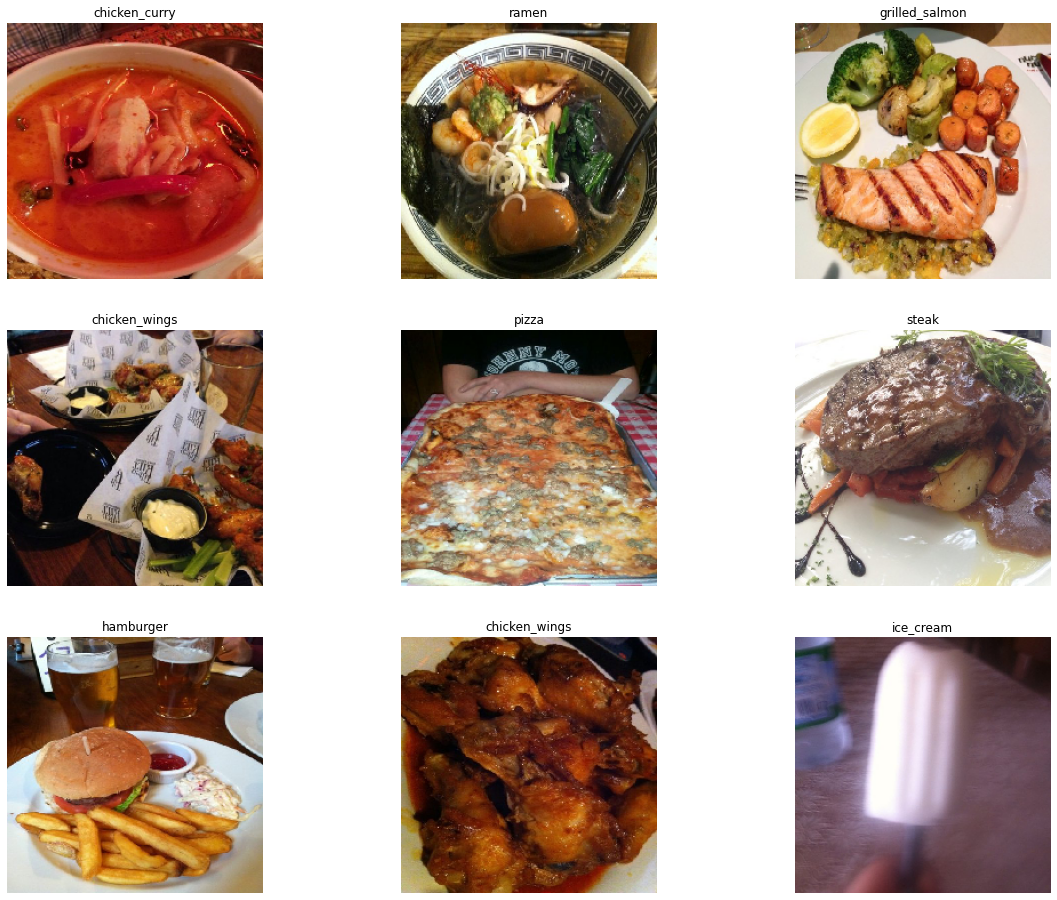

In [23]:
view_random_image(how_many=9)

## Baseline model

In [24]:
tf.random.set_seed(42)

food_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

food_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

food_history = food_model.fit(train_data,
               epochs=5,
               steps_per_epoch=len(train_data),
               validation_data=test_data,
               validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 50s 208ms/step - loss: 2.0875 - accuracy: 0.2455 - val_loss: 2.0088 - val_accuracy: 0.2780
Epoch 2/5
235/235 [==============================] - 48s 203ms/step - loss: 1.8616 - accuracy: 0.3601 - val_loss: 1.8807 - val_accuracy: 0.3500
Epoch 3/5
235/235 [==============================] - 46s 195ms/step - loss: 1.5439 - accuracy: 0.4799 - val_loss: 1.9100 - val_accuracy: 0.3480
Epoch 4/5
235/235 [==============================] - 45s 193ms/step - loss: 1.0114 - accuracy: 0.6653 - val_loss: 2.1745 - val_accuracy: 0.3216
Epoch 5/5
235/235 [==============================] - 45s 191ms/step - loss: 0.4911 - accuracy: 0.8435 - val_loss: 2.9691 - val_accuracy: 0.3112


In [25]:
import pandas as pd

In [33]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  plt.plot(loss, label='train loss')
  plt.plot(val_loss, label='test loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()


  plt.figure()
  plt.plot(accuracy, label='train accuracy')
  plt.plot(val_accuracy, label='test accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

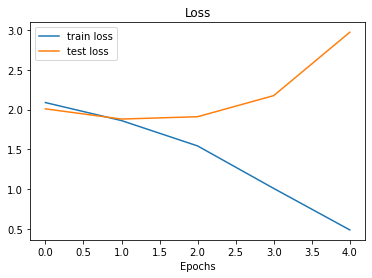

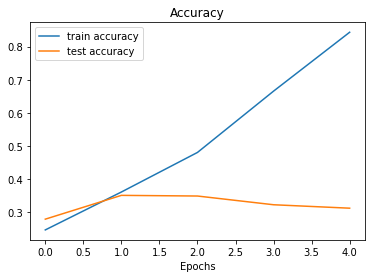

In [34]:
plot_loss_curves(food_history)

## Second model - trying to delete 2 Conv layers

In [28]:
tf.random.set_seed(42)

food_model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

food_model_2.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

In [29]:
food_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [30]:
food_history_2 = food_model_2.fit(train_data,
               epochs=5,
               steps_per_epoch=len(train_data),
               validation_data=test_data,
               validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 193ms/step - loss: 2.1115 - accuracy: 0.2456 - val_loss: 1.9420 - val_accuracy: 0.3152
Epoch 2/5
235/235 [==============================] - 50s 213ms/step - loss: 1.8028 - accuracy: 0.3835 - val_loss: 1.8955 - val_accuracy: 0.3640
Epoch 3/5
235/235 [==============================] - 53s 227ms/step - loss: 1.4702 - accuracy: 0.5220 - val_loss: 1.8864 - val_accuracy: 0.3536
Epoch 4/5
235/235 [==============================] - 43s 184ms/step - loss: 1.0055 - accuracy: 0.6888 - val_loss: 2.1313 - val_accuracy: 0.3300
Epoch 5/5
235/235 [==============================] - 44s 185ms/step - loss: 0.5800 - accuracy: 0.8352 - val_loss: 2.5430 - val_accuracy: 0.3256


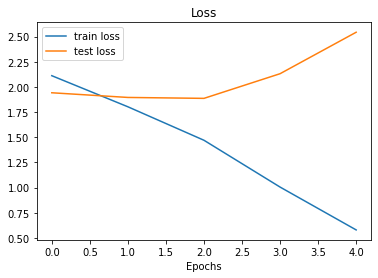

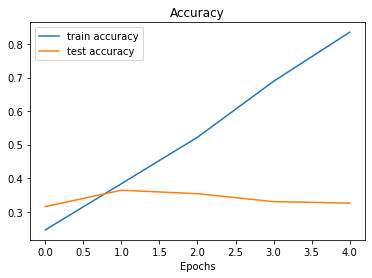

In [36]:
plot_loss_curves(food_history_2)

After removing 2 Conv layers model is as inaccurate as it was, because of the number of parameters - it is pretty much the same

## Trying data augmentation for reducing overfitting

In [40]:
train_datagen_augmented = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,
                                                                          rotation_range=0.2,
                                                                          width_shift_range=0.2,
                                                                          height_shift_range=0.2,
                                                                          zoom_range=0.2,
                                                                          horizontal_flip=True)

In [41]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224))

Found 7500 images belonging to 10 classes.


In [42]:
food_model_3 = tf.keras.models.clone_model(food_model)

food_model_3.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

food_history_3 = food_model_3.fit(train_data_augmented,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 113s 475ms/step - loss: 2.2731 - accuracy: 0.1345 - val_loss: 2.1946 - val_accuracy: 0.1720
Epoch 2/5
235/235 [==============================] - 110s 467ms/step - loss: 2.1782 - accuracy: 0.2021 - val_loss: 2.0763 - val_accuracy: 0.2532
Epoch 3/5
235/235 [==============================] - 109s 466ms/step - loss: 2.1273 - accuracy: 0.2249 - val_loss: 1.9957 - val_accuracy: 0.2784
Epoch 4/5
235/235 [==============================] - 109s 464ms/step - loss: 2.0751 - accuracy: 0.2501 - val_loss: 2.0078 - val_accuracy: 0.2832
Epoch 5/5
235/235 [==============================] - 112s 475ms/step - loss: 2.0222 - accuracy: 0.2844 - val_loss: 1.8893 - val_accuracy: 0.3356


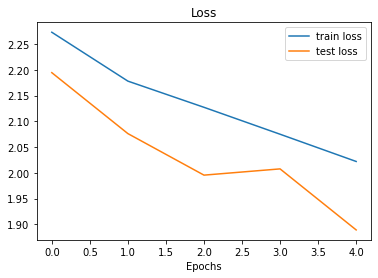

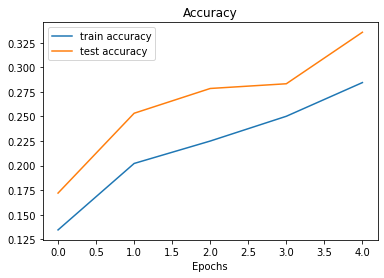

In [43]:
plot_loss_curves(food_history_3)

## Probably we should train for longer - 15 epochs more

In [44]:
food_history_3 = food_model_3.fit(train_data_augmented,
                                  epochs=15,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data))

Epoch 1/15
235/235 [==============================] - 118s 500ms/step - loss: 1.9840 - accuracy: 0.2983 - val_loss: 1.9262 - val_accuracy: 0.3376
Epoch 2/15
235/235 [==============================] - 110s 469ms/step - loss: 1.9429 - accuracy: 0.3229 - val_loss: 1.7647 - val_accuracy: 0.3836
Epoch 3/15
235/235 [==============================] - 118s 504ms/step - loss: 1.9042 - accuracy: 0.3420 - val_loss: 1.7531 - val_accuracy: 0.4032
Epoch 4/15
235/235 [==============================] - 127s 541ms/step - loss: 1.8824 - accuracy: 0.3497 - val_loss: 1.8103 - val_accuracy: 0.3976
Epoch 5/15
235/235 [==============================] - 141s 600ms/step - loss: 1.8508 - accuracy: 0.3604 - val_loss: 1.9255 - val_accuracy: 0.3608
Epoch 6/15
235/235 [==============================] - 142s 605ms/step - loss: 1.8275 - accuracy: 0.3733 - val_loss: 1.7013 - val_accuracy: 0.4252
Epoch 7/15
235/235 [==============================] - 136s 580ms/step - loss: 1.8075 - accuracy: 0.3739 - val_loss: 1.7944 -

## Trying on my own data

In [49]:
import matplotlib.image as mpimg

In [51]:
!wget https://cdn-rdb.arla.com/apetina-pl/sushi-burritos/319963532.jpg
sushi = mpimg.imread('319963532.jpg')


!wget https://food-images.files.bbci.co.uk/food/recipes/no-churn_cheesecake_ice_81708_16x9.jpg
ice_cream = mpimg.imread('no-churn_cheesecake_ice_81708_16x9.jpg')

!wget https://www.canalpluskuchnia.pl/wideo/43821-grzeszne-przyjemnosci/01-hamburger.jpg
hamburger = mpimg.imread('01-hamburger.jpg')

!wget https://i.wpimg.pl/1200x/d.wpimg.pl/1880868878-932788179/slony-spichlerz.JPG
ramen = mpimg.imread('slony-spichlerz.JPG')

--2022-07-19 13:52:02--  https://cdn-rdb.arla.com/apetina-pl/sushi-burritos/319963532.jpg
Resolving cdn-rdb.arla.com (cdn-rdb.arla.com)... 152.199.39.108, 2606:2800:247:1cb7:261b:1f9c:2074:3c
Connecting to cdn-rdb.arla.com (cdn-rdb.arla.com)|152.199.39.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3641709 (3.5M) [image/jpeg]
Saving to: ‘319963532.jpg.1’

319963532.jpg.1     100%[===================>]   3.47M  --.-KB/s    in 0.02s   

2022-07-19 13:52:02 (223 MB/s) - ‘319963532.jpg.1’ saved [3641709/3641709]

--2022-07-19 13:52:02--  https://food-images.files.bbci.co.uk/food/recipes/no-churn_cheesecake_ice_81708_16x9.jpg
Resolving food-images.files.bbci.co.uk (food-images.files.bbci.co.uk)... 23.9.188.16, 2600:1413:a000:4af::f33, 2600:1413:a000:48b::f33, ...
Connecting to food-images.files.bbci.co.uk (food-images.files.bbci.co.uk)|23.9.188.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1014540 (991K) [image/jpeg]
Saving to: ‘

In [95]:
import numpy as np

def prepare_and_predict(img, model, class_names):
  # img = tf.constant(img)
  img = tf.image.resize(img, (224, 224))
  img = img/255.
  # print(img.ndims)
  y_pred = model.predict(tf.expand_dims(img, axis=0)).argmax()

  plt.imshow(img)
  plt.title(f'Predicted: {class_names[y_pred]}')
  plt.axis(False)
  plt.show()

In [96]:
sushi.resize()

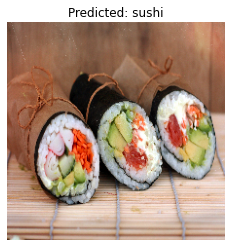

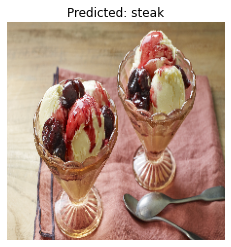

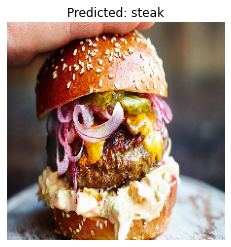

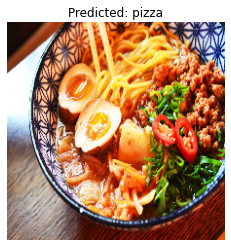

In [97]:
prepare_and_predict(sushi, food_model_3, class_names)
prepare_and_predict(ice_cream, food_model_3, class_names)
prepare_and_predict(hamburger, food_model_3, class_names)
prepare_and_predict(ramen, food_model_3, class_names)

## Probably we should try Transfer Learning or fit for longer. I will try the first thing in the next notebook

In [99]:
# Saving 
food_model_3.save('saved_food_model-42percent')

INFO:tensorflow:Assets written to: saved_food_model-42percent/assets


INFO:tensorflow:Assets written to: saved_food_model-42percent/assets
